In [ ]:
#1. import required libraries
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# New Section

In [ ]:
#2. Load the image and convert it to a data frame.

Categories=['bed','chair', 'closet', 'couch', 'table']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir= "/content/gdrive/MyDrive/3rd_yr/AI/APS360/SVM/dataset_obstacle_classification"
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

loading... category : bed
loaded category:bed successfully
loading... category : chair
loaded category:chair successfully
loading... category : closet
loaded category:closet successfully
loading... category : couch
loaded category:couch successfully
loading... category : table
loaded category:table successfully


(73, 67501)

In [ ]:
#3. Separate input features and targets.

#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [ ]:
#4: Separate input features and targets.
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=77,
											stratify=y)


In [ ]:
#5: Build and train the model

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
# Training the model using the training data
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [ ]:
import pickle
filename = "my_model.pickle"
# save model
pickle.dump(model, open(filename, "wb"))

In [ ]:
# load model
loaded_model = pickle.load(open(filename, "rb"))

In [ ]:
#6: Model evaluation

# Testing the model using the testing data
y_pred = loaded_model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

print(classification_report(y_test, y_pred,
                target_names=['bed','chair', 'closet', 'couch', 'table']))


The model is 66.66666666666666% accurate
              precision    recall  f1-score   support

         bed       0.75      0.75      0.75         4
       chair       0.43      1.00      0.60         3
      closet       1.00      0.75      0.86         4
       couch       0.00      0.00      0.00         2
       table       1.00      0.50      0.67         2

    accuracy                           0.67        15
   macro avg       0.64      0.60      0.57        15
weighted avg       0.69      0.67      0.64        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 7: Prediction

def predict(path):
	img=imread(path)
	plt.imshow(img)
	plt.show()
	img_resize=resize(img,(150,150,3))
	l=[img_resize.flatten()]
	probability=model.predict_proba(l)
	for ind,val in enumerate(Categories):
		print(f'{val} = {probability[0][ind]*100}%')
	print("The predicted image is : "+Categories[model.predict(l)[0]])


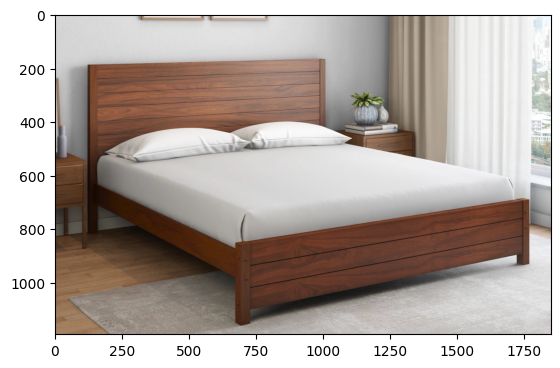

bed = 49.800261565443975%
chair = 6.396385367825731%
closet = 39.09483739892208%
couch = 2.274548841479686%
table = 2.433966826328524%
The predicted image is : bed


In [ ]:
path='/content/gdrive/MyDrive/3rd_yr/AI/APS360/SVM/dataset_validation/obstacle_classification/bed.jpeg'
predict(path)